In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score

In [2]:
data = pd.read_csv(r"C:\Users\Srivathsan\Downloads\creditcard.csv\creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
legit=data[data['Class']==0]
fraud=data[data['Class']==1]

In [8]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [9]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [12]:
legit = legit.sample(n=492)

In [13]:
new_data = pd.concat([legit,fraud],axis=0)

In [14]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
203336,134774.0,2.241079,-1.382300,-0.668048,-1.684624,-1.176245,-0.082773,-1.347660,-0.013308,-1.465441,...,-0.080194,0.293738,0.283801,0.711900,-0.277055,-0.229538,0.028554,-0.046110,12.40,0
217747,141015.0,-0.114634,-0.317904,-0.928250,-2.660397,1.337678,1.166848,0.865049,0.209995,-1.591131,...,0.599213,1.563169,0.168834,-0.905154,-0.810802,-0.241784,0.205769,0.226693,118.00,0
186176,126987.0,1.525451,-1.440427,-0.938893,-0.396374,-1.038782,-0.866531,-0.045502,-0.201175,1.651115,...,-0.282291,-1.249264,0.218878,-0.112296,-0.716218,0.178287,-0.100263,-0.005491,279.64,0
143091,85115.0,-2.365199,1.142317,0.236972,0.482095,-1.311259,-0.358795,-0.359511,1.302159,-0.119408,...,0.120301,0.353297,-0.140717,0.479498,-0.183577,0.364727,0.084779,-0.073928,93.59,0
219360,141702.0,-1.770558,2.164925,-1.313255,-0.842350,1.099584,-0.713084,1.274970,-0.548027,1.544953,...,-0.013998,0.876789,-0.355710,-1.166396,-0.239322,-0.256056,-0.868978,-0.648273,5.89,0


In [15]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 203336 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64

In [16]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [17]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97624.711382,0.042791,0.081845,-0.094271,-0.065432,-0.060546,0.008461,-0.077971,0.063235,0.032106,...,0.009518,0.023002,0.027289,0.029767,-0.017295,-0.025028,-0.003592,0.004639,0.001892,77.787459
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [18]:
X = new_data.drop(columns='Class',axis=1)
y = new_data['Class']

In [19]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
203336  134774.0  2.241079 -1.382300 -0.668048 -1.684624 -1.176245 -0.082773   
217747  141015.0 -0.114634 -0.317904 -0.928250 -2.660397  1.337678  1.166848   
186176  126987.0  1.525451 -1.440427 -0.938893 -0.396374 -1.038782 -0.866531   
143091   85115.0 -2.365199  1.142317  0.236972  0.482095 -1.311259 -0.358795   
219360  141702.0 -1.770558  2.164925 -1.313255 -0.842350  1.099584 -0.713084   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [20]:
print(y)

203336    0
217747    0
186176    0
143091    0
219360    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [22]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


# Logistic Regression

In [23]:
reg = LogisticRegression(max_iter = 150)
reg.fit(X_train,y_train)

C:\Users\Srivathsan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=150)

In [24]:
predictions = reg.predict(X_test)

In [25]:
accuracy = accuracy_score(predictions,y_test)
print(accuracy)

0.9441624365482234


In [42]:
y_pred_probs = reg.predict_proba(X_test)[:,1]

In [44]:
print(y_pred_probs[0])

0.13772511268459722


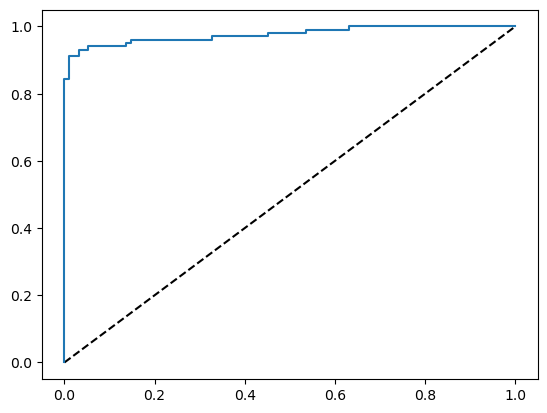

In [45]:
fpr,tpr,threshholds = roc_curve(y_test,y_pred_probs)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.show()

In [46]:
print(roc_auc_score(y_test,y_pred_probs))

0.976264189886481
